In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [4]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

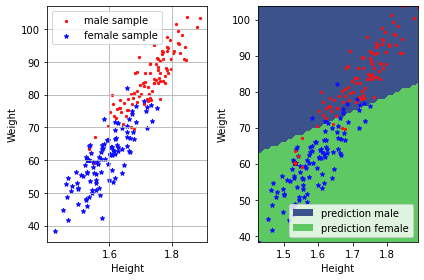

In [5]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    # w = least squares with respect to tx and y
    w = np.linalg.solve(a, b)
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [8]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    return 1.0 / (1 + np.exp(-t))

In [71]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    m = tx.shape[0]
    p = sigmoid(tx.dot(w))
    loss = -(np.mean( y*np.log(p)+(1-y)*np.log(1-p) ))
    return loss

In [72]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    m = tx.shape[0]
    p = sigmoid(tx.dot(w))
    grad = ((np.dot(tx.T, (p-y))))/m
    # grad =  np.dot(tx.T, (p-y))
    return grad

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [73]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the loss
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient
    # ***************************************************
    grad = calculate_gradient(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w
    # ***************************************************
    w = w - gamma * grad
    return loss, w

Demo!

Current iteration=0, loss=0.6931471805599452
Current iteration=100, loss=0.30810264802560783
Current iteration=200, loss=0.28407249993364103
Current iteration=300, loss=0.27246539448162577
Current iteration=400, loss=0.2641244039777627
Current iteration=500, loss=0.2573654866952214
Current iteration=600, loss=0.25165558631391177
Current iteration=700, loss=0.2467480173038936
Current iteration=800, loss=0.2424918456835165
Current iteration=900, loss=0.23877818703626807
Current iteration=1000, loss=0.23552197315157436
Current iteration=1100, loss=0.23265435308704766
Current iteration=1200, loss=0.23011869787225372
Current iteration=1300, loss=0.22786803129427569
Current iteration=1400, loss=0.22586315747562297
Current iteration=1500, loss=0.22407121135857985
Current iteration=1600, loss=0.22246450791932326
Current iteration=1700, loss=0.22101961916189075
Current iteration=1800, loss=0.2197166302155557
Current iteration=1900, loss=0.21853853776613416
Current iteration=2000, loss=0.2174707

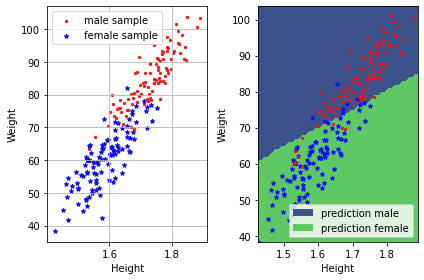

In [75]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 100000
    threshold = 1e-8
    gamma = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    print("weight = {w}".format(w = w))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [79]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate Hessian: TODO
    # ***************************************************
    m = tx.shape[0]
    p = sigmoid(tx.dot(w))
    p_matrix = np.mat(p)
    p_diag = np.diag(p_matrix.getA1())
    a = np.dot(tx.T, p_diag)
    b = np.dot(a, np.diag((1 - p_matrix).getA1()))
    q = np.dot(b, tx)
    hessian = 1.0 / m * q
    return hessian


Write a function below to return loss, gradient, and Hessian.

In [80]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, grad, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [81]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and Hessian: TODO
    # ***************************************************
    loss, grad, hessian = logistic_regression(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    hessianI = np.linalg.inv(hessian)
    w = w - gamma * hessianI.dot(grad)
    return loss, w

demo

Current iteration=0, the loss=0.6931471805599452
Current iteration=1, the loss=0.317057768695479
Current iteration=2, the loss=0.23652293099675284
Current iteration=3, the loss=0.20998733711242232
Current iteration=4, the loss=0.20478199318618967
Current iteration=5, the loss=0.20447559968244786
Current iteration=6, the loss=0.2044741280881354
Current iteration=7, the loss=0.20447412804945286
loss=0.20447412804945292
weight = [[ 0.23840601]
 [ 2.46367002]
 [-6.9951691 ]]


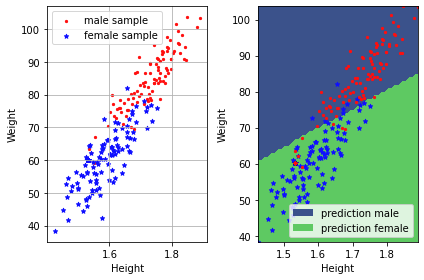

In [82]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    print("weight = {w}".format(w = w))


logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [83]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    loss = loss + np.dot(w.T, w) * lambda_
    grad = calculate_gradient(y, tx, w)
    grad = grad + 2 * lambda_ * w
    return loss, grad

In [84]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient
    # ***************************************************
    loss, grad = penalized_logistic_regression(y, tx, w, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w
    # ***************************************************
    w = w - gamma * grad
    return loss, w

Current iteration=0, loss=[[0.69314718]]
Current iteration=100, loss=[[0.5398887]]
Current iteration=200, loss=[[0.49581159]]
Current iteration=300, loss=[[0.48121927]]
Current iteration=400, loss=[[0.47590894]]
Current iteration=500, loss=[[0.47384738]]
Current iteration=600, loss=[[0.47300396]]
Current iteration=700, loss=[[0.47264088]]
Current iteration=800, loss=[[0.47247575]]
Current iteration=900, loss=[[0.47239598]]
Current iteration=1000, loss=[[0.47235497]]
Current iteration=1100, loss=[[0.4723326]]
Current iteration=1200, loss=[[0.47231976]]
Current iteration=1300, loss=[[0.4723121]]
Current iteration=1400, loss=[[0.47230738]]
Current iteration=1500, loss=[[0.47230443]]
Current iteration=1600, loss=[[0.47230255]]
loss=0.3901447356857388
weight = [[ 0.02367169]
 [-0.50754908]
 [-0.75060008]]


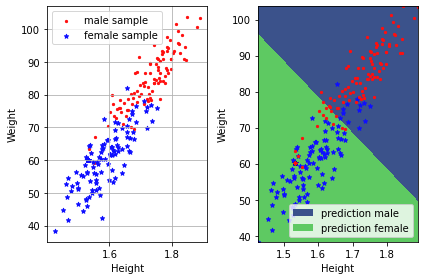

In [85]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    print("weight = {w}".format(w = w))
    
logistic_regression_penalized_gradient_descent_demo(y, x)